In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from datetime import datetime
import numpy as np

In [18]:
askmen_df = pd.read_csv('cleaned_askmen.csv')
askwomen_df = pd.read_csv('cleaned_askwomen.csv')
# convert timestamp column to python datetime
askmen_df['timestamp'] = askmen_df['timestamp'].apply(lambda x: datetime.utcfromtimestamp(int(x)))
askwomen_df['timestamp'] = askwomen_df['timestamp'].apply(lambda x: datetime.utcfromtimestamp(int(x)))

C:\Users\17327\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
def addtime(df):
    df = df[['title','num_comments','timestamp']].copy()
    df['year'] = df['timestamp'].dt.to_period('Y')
    df['year-month'] = df['timestamp'].dt.to_period('M')
    df['month'] = df['timestamp'].dt.month
    df = df.sort_values(['year','month'],ascending=True)
    df['year'] = df['year'].astype(str)
    df['month'] = df['month'].astype(str)
    return df

def counttime(df):
    df = df.groupby(['year']).count().reset_index()
    return df

In [4]:
askmen_df = addtime(askmen_df)
askwomen_df = addtime(askwomen_df)
men_count = counttime(askmen_df)
women_count = counttime(askwomen_df)

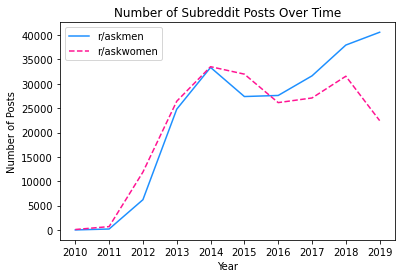

In [5]:
plt.plot('year', 'title', data=men_count, color='dodgerblue',label='r/askmen')
plt.plot('year', 'title', data=women_count, color='deeppink',label='r/askwomen',linestyle='dashed')
plt.title("Number of Subreddit Posts Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Posts")
plt.legend();

#colors: https://matplotlib.org/stable/gallery/color/named_colors.html#base-colors

In [6]:
def clean_data(df):
    df['num_comments'] = abs(df['num_comments'])
    return df

In [7]:
clean_data(askmen_df)
clean_data(askwomen_df)

,title,num_comments,timestamp,year,year-month,month
0,Women of Reddit: What do you find is the most...,51,2010-07-17 01:32:26,2010,2010-07,7
1,"Dear Women of Reddit, why when you do an AMA d...",30,2010-07-17 08:59:43,2010,2010-07,7
2,Askwomen: What do you think when you're lookin...,53,2010-07-17 10:17:08,2010,2010-07,7
3,"Dear ladies, How wet is it normally down there?",30,2010-07-17 13:04:54,2010,2010-07,7
4,"Do you dress to impress other women, men, or j...",25,2010-07-19 21:35:06,2010,2010-07,7
...,...,...,...,...,...,...
211821,Women who've been cheated on but got an apolog...,19,2019-08-31 22:28:55,2019,2019-08,8
211822,How is college senior dating college freshman ...,12,2019-08-31 22:30:52,2019,2019-08,8
211823,How do you keep from texting your ex in moment...,18,2019-08-31 23:12:20,2019,2019-08,8
211824,How important is a mans style?,4,2019-08-31 23:37:42,2019,2019-08,8


In [8]:
men_comments = askmen_df.groupby('num_comments').count().reset_index()
women_comments = askwomen_df.groupby('num_comments').count().reset_index()

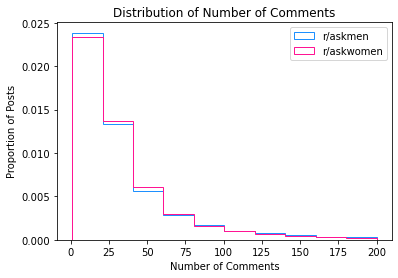

In [26]:
plt.hist(askmen_df['num_comments'], range=(1,200), color='dodgerblue',label='r/askmen', histtype='step', density=True)
plt.hist(askwomen_df['num_comments'], range=(1,200), color='deeppink',label='r/askwomen',histtype='step', density=True)
plt.title("Distribution of Number of Comments")
plt.xlabel("Number of Comments")
plt.ylabel("Proportion of Posts")
#plt.xscale('log')
#plt.yscale('log')
plt.legend();

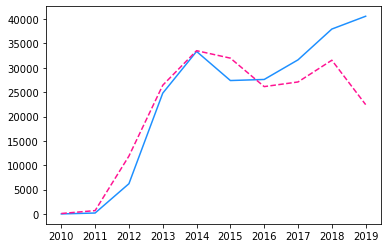

In [14]:
plt.plot('year', 'title', data=men_count, color='dodgerblue',label='r/askmen')
plt.plot('year', 'title', data=women_count, color='deeppink',label='r/askwomen',linestyle='dashed')

In [20]:
comments_df = pd.DataFrame(columns=['date','mean_comments','median_comments','standard_deviation',"num_of_no_comments"])
for i in askmen_df['year'].unique():
    month = askmen_df[askmen_df['year'] == i]
    data = pd.DataFrame({'date':i,
           'mean_comments':np.mean(month['num_comments']),
           'median_comments':np.median(month['num_comments']),
           'standard_deviation':np.std(month['num_comments']),
           "num_of_no_comments":sum(month['num_comments']==0)}, index=[0])
    comments_df = comments_df.append(data, ignore_index=True)
comments_df

,date,mean_comments,median_comments,standard_deviation,num_of_no_comments
0,2010-08,16.000000,16.000000,16.000000,0
1,2011-04,12.000000,12.000000,12.000000,0
2,2011-06,33.000000,33.000000,33.000000,0
3,2011-07,24.178571,24.178571,24.178571,0
4,2011-08,29.700000,29.700000,29.700000,0
...,...,...,...,...,...
116,2015,55.722015,27.000000,97.953315,0
117,2016,57.158240,27.000000,110.917214,0
118,2017,47.333512,22.000000,99.803020,0
119,2018,47.144016,19.000000,155.140496,0


In [21]:
comments_df.tail(10)

,date,mean_comments,median_comments,standard_deviation,num_of_no_comments
111,2010,16.000000,16.0,0.000000,0
112,2011,24.080214,21.0,18.256608,0
113,2012,42.785047,26.0,69.546806,0
114,2013,53.700367,28.0,96.151678,0
115,2014,50.825557,25.0,95.418950,0
116,2015,55.722015,27.0,97.953315,0
117,2016,57.158240,27.0,110.917214,0
118,2017,47.333512,22.0,99.803020,0
119,2018,47.144016,19.0,155.140496,0
120,2019,47.079548,18.0,241.778884,0


In [23]:
np.mean(askmen_df['num_comments']), np.median(askmen_df['num_comments']), np.std(askmen_df['num_comments'])

(50.49046798286849, 23.0, 144.1078397885102)

In [24]:
np.mean(askwomen_df['num_comments']), np.median(askwomen_df['num_comments']), np.std(askwomen_df['num_comments'])

(45.08279436896321, 23.0, 90.32732506227075)